In [1]:
import pandas as pd
import numpy as np

In [2]:
data_age = pd.read_csv("id_age_train.csv", sep=",")
data_vitals = pd.read_csv("id_time_vitals_train.csv", sep=",")
data_labels = pd.read_csv("id_label_train.csv", sep=",")
data_labs = pd.read_csv("id_time_labs_train.csv", sep = ",")

In [3]:
data_timeseries = pd.merge(data_labs, data_vitals)

In [4]:
patients = list(data_timeseries['ID'])
patient_ids = list(data_timeseries['ID'].unique())
labels_zeros = np.zeros(len(patients))
labels = np.zeros(len(patients))

In [5]:
id_age_label_train=data_age.merge(data_labels)

In [6]:
merged = data_timeseries.merge(id_age_label_train)

In [7]:
merged2=merged[['ID', 'TIME', 'AGE', 'ICU','LABEL']]
merged2['V6_clean']=merged['V6'].apply(lambda x: x if (x>80 or x<112) else 80 if x<80 else 112)
merged2['V5_clean']=merged['V5'].apply(lambda x: 100 if x>100 else x if x>0 else -1*x )
merged2['V4_clean']=merged['V4'].apply(lambda x: x if x>0 else -1*x )
merged2['V3_clean']=merged['V3'].apply(lambda x: x if (x>30 and x<220) else np.nan )
merged2['V2_clean']=merged['V2'].apply(lambda x: x if (x>15 and x<200) else np.nan )
merged2['V1_clean']=merged['V1'].apply(lambda x: x if (x>30 and x<300) else np.nan )
merged2['L1_clean']=merged['L1'].apply(lambda x: x if (x>0 and x<14) else np.nan)
merged2['L2_clean']=merged['L2'].apply(lambda x: 132 if x>132 else x if x>0 else np.nan )
merged2[['L3_clean', 'L4_clean', 'L5_clean', 'L6_clean']]=merged[['L3','L4','L5','L6']].applymap(lambda x: x if x>0 else np.nan )
merged2['L7_clean']=merged['L7'].apply(lambda x: x if x<700 else 700 if x>700 else np.nan)
merged2['L8_clean']=merged['L8'].apply(lambda x: x if x<200 else 200 if x>200 else np.nan)
merged2['L9_clean']=merged['L9'].apply(lambda x: x if x<100 else x/1000)
merged2['L10_clean']=merged['L10'].apply(lambda x: x if (x>0 and x<100) else np.nan)
merged2['L11_clean']=merged['L11'].apply(lambda x: x if (x>0 and x<2000) else 2000 if x>2000 else np.nan)
merged2['L12_clean']=merged['L12'].apply(lambda x: x if x<5 else 5+(x-5)/10)
merged2['L13_clean']=merged['L13'].apply(lambda x: x if x>0 else np.nan)
merged2['L14_clean']=merged['L14'].apply(lambda x: x if x>0 else np.nan)
merged2['L15_clean']=merged['L15'].apply(lambda x: x if (x>0 and x<20) else 20 if x>20 else np.nan)
merged2[['L16_clean','L17_clean']]=merged[['L16','L17']].applymap(lambda x: x if x>0 else np.nan)
merged2['L18_clean']=merged['L18'].apply(lambda x: x if x<1000 else 1000 if x>1000 else np.nan)
merged2['L19_clean']=merged['L19'].apply(lambda x: x if x<800 else 800 if x>800 else np.nan)
merged2['L20_clean']=merged['L20'].apply(lambda x: x/100 if x>1000 else x/10 if x>100 else x if x>0 else np.nan)
merged2['L21_clean']=merged['L21'].apply(lambda x: x if x>0 else np.nan)
merged2['L22_clean']=merged['L22'].apply(lambda x: x if x>0 else -1*x)
merged2['L23_clean']=merged['L23'].apply(lambda x: 3000 if x>3000 else x if x>0 else -1*x)
merged2['L24_clean']=merged['L24'].apply(lambda x: x if x>0 else np.nan)
merged2['L25_clean']=merged['L25'].apply(lambda x: x if x>0 else np.nan)

/home/siddharth/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/home/siddharth/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/siddharth/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [9]:
import matplotlib.pyplot as plt

In [13]:
len(merged2.columns[5:])

31

ERROR: Line magic function `%xmatplotlib` not found.


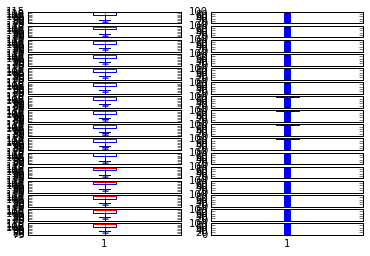

In [16]:
%xmatplotlib inline
nrows = 16
fig, axes = plt.subplots(nrows, 2)
col = merged2.columns[5:]
index=0
for row in axes:
    for i in range(0,2):
        row[i].boxplot(merged2[col[index+i]])
index +=2    
plt.show()

In [108]:
merged2.head()

,ID,TIME,AGE,ICU,LABEL,V6_clean,V5_clean,V4_clean,V3_clean,V2_clean,...,L16_clean,L17_clean,L18_clean,L19_clean,L20_clean,L21_clean,L22_clean,L23_clean,L24_clean,L25_clean
0,1,0,42,0,1,112.0,87,NaN,70,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4320,42,0,1,112.0,NaN,NaN,70,NaN,...,NaN,NaN,NaN,NaN,10.020629,NaN,NaN,NaN,NaN,NaN
2,1,5646,42,1,1,96.6,NaN,NaN,NaN,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,5703,42,1,1,112.0,NaN,32,91,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,6342,42,1,1,112.0,100,29,107,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
merged2_id_time = merged2.groupby(['ID','TIME']).mean()

In [106]:
normal = {attribute: merged2[attribute].mean() for attribute in merged2.columns}
merged2_id.apply(lambda x: x.fillna(normal))

Traceback (most recent call last):
  File "/home/siddharth/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 970, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/home/siddharth/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 233, in wrapped
    return f(*args, **kwargs)
  File "/home/siddharth/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 285, in _fixed_getinnerframes
    lines = ulinecache.getlines(file)[start:end]
  File "/home/siddharth/anaconda/lib/python2.7/site-packages/IPython/utils/ulinecache.py", line 37, in getlines
    return [l.decode(encoding, 'replace') for l in lines]
  File "/home/siddharth/anaconda/lib/python2.7/encodings/utf_8.py", line 16, in decode
    return codecs.utf_8_decode(input, errors, True)


ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.



KeyboardInterrupt



Unfortunately, your original traceback can not be constructed.



TypeError: 'NoneType' object is not iterable

In [97]:
merged2_id = merged2.groupby('ID')

In [101]:
first_values=merged2_id.apply(lambda x: x.iloc[0,:]).drop(['ID','TIME', 'LABEL','AGE','ICU'], axis=1).add_suffix("_first_values")


In [102]:
first_values

,V6_clean_first_values,V5_clean_first_values,V4_clean_first_values,V3_clean_first_values,V2_clean_first_values,V1_clean_first_values,L1_clean_first_values,L2_clean_first_values,L3_clean_first_values,L4_clean_first_values,...,L16_clean_first_values,L17_clean_first_values,L18_clean_first_values,L19_clean_first_values,L20_clean_first_values,L21_clean_first_values,L22_clean_first_values,L23_clean_first_values,L24_clean_first_values,L25_clean_first_values
ID,,,,,,,,,,,,,,,,,,,,,
1,112.0,87,NaN,70,49,86,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.752236,...,NaN,NaN,199.771969,NaN,NaN,4.206512,58.669735,12.704425,NaN,NaN
3,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.568467,...,NaN,NaN,140.746697,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.706280,...,NaN,NaN,287.810321,NaN,NaN,3.526214,154.532957,92.678812,NaN,NaN
5,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.474115,...,NaN,NaN,104.493931,NaN,NaN,2.646761,136.710274,3.057411,NaN,NaN
6,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.014182,...,NaN,NaN,147.314355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,90.7,NaN,32,71,49,94,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.683808,...,7.231740,NaN,165.280538,NaN,NaN,3.922412,84.521329,18.313668,NaN,NaN
9,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.315230,...,NaN,NaN,123.348987,NaN,NaN,3.722340,89.585679,0.684202,NaN,NaN
